### Libraries, imports, read data

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [ ]:
sns.set_theme()

In [ ]:
# Get working directory
working_directory = os.getcwd()
print(working_directory)

/content


In [ ]:
reconstruction = pd.read_csv(working_directory + "/data/sp_3D_reconstruction.csv")
grades = pd.read_csv(working_directory + "/data/user_graded.csv")

In [ ]:
# #merge tables on image name to match them
# data = pd.merge(reconstruction, grades, left_on='HashedName', right_on="image_name")
# data.head()

In [ ]:
#adding shapeMetrics templating table to the data
shapemetrics = pd.read_excel(working_directory + "/data/shapemetrics.xlsx")

In [ ]:
shapemetrics

,Folder_Name,Image_Name,firstorder_count,tail_count,residerror_count,roothairs_count,sphereerrors_count,largeresiderror_count,area_px,length_px,width_px,weight_oz,length_in,width_in
0,20220319T083623.000000-0500_M2_L3_G1_C3_V1_V2_...,"=HYPERLINK(""20220319T083623.000000-0500_M2_L3_...",2804,0.215407,0.141227,0.015692,0.054565,0.039586,29050,260.197661,152.546485,7.134474,110.658241,64.875778
1,20220319T083639.000000-0500_M3_L4_G1_C4_V1_V2_...,"=HYPERLINK(""20220319T083639.000000-0500_M3_L4_...",2859,0.188877,0.162644,0.016090,0.036726,0.023085,47695,399.707529,157.266937,14.600909,169.989737,66.883317
2,20220319T083643.000000-0500_M3_L4_G1_C4_V1_V2_...,"=HYPERLINK(""20220319T083643.000000-0500_M3_L4_...",3389,0.056064,0.109767,0.012393,0.014459,0.005311,42128,364.020782,148.683275,12.204608,154.812688,63.232812
3,20220319T083645.000000-0500_M2_L3_G1_C3_V1_V2_...,"=HYPERLINK(""20220319T083645.000000-0500_M2_L3_...",3897,0.098024,0.065435,0.004362,0.072620,0.034642,44091,338.885652,167.392271,13.034452,144.123087,71.189472
4,20220319T083648.000000-0500_M1_L3_G1_C3_V1_V2_...,"=HYPERLINK(""20220319T083648.000000-0500_M1_L3_...",3573,0.141338,0.065491,0.004478,0.024349,0.016233,71334,420.642300,219.768920,26.115316,178.892988,93.464492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,20220326T095003.000000-0500_M3_L4_G1_C4_V1_V2_...,"=HYPERLINK(""20220326T095003.000000-0500_M3_L4_...",2447,0.198202,0.142624,0.025337,0.017164,0.009808,34409,336.367361,137.464943,9.110932,143.052095,58.461820
2396,20220326T095009.000000-0500_M3_L1_G1_C1_V1_V2_...,"=HYPERLINK(""20220326T095009.000000-0500_M3_L1_...",2599,0.280877,0.132359,0.008465,0.015391,0.007695,63556,507.245285,178.905756,22.104110,215.723965,76.085989
2397,20220326T095010.000000-0500_M3_L3_G1_C3_V1_V2_...,"=HYPERLINK(""20220326T095010.000000-0500_M3_L3_...",1960,0.078571,0.184184,0.064286,0.019388,0.006122,26526,337.587542,105.944480,6.256698,143.571020,45.056630
2398,20220326T095019.000000-0500_M3_L1_G1_C1_V1_V2_...,"=HYPERLINK(""20220326T095019.000000-0500_M3_L1_...",3755,0.283888,0.035952,0.011984,0.246338,0.093475,29542,237.600531,167.712360,7.309658,101.048014,71.325602


In [ ]:
data = pd.merge(pd.merge(reconstruction, grades, left_on='HashedName', right_on='image_name'),
                shapemetrics, left_on='Title', right_on='Folder_Name')
data.head()

,Title,AxialLength,TipLength,Curvature,MaxDiameter,LWRatio,TailLength,TailPct,Shape,BodyLength,...,residerror_count,roothairs_count,sphereerrors_count,largeresiderror_count,area_px,length_px,width_px,weight_oz,length_in,width_in
0,20220319T083623.000000-0500_M2_L3_G1_C3_V1_V2_...,4.899334,4.667257,1.084719,2.683434,1.625563,0.167688,0.034227,Undefined,4.731646,...,0.141227,0.015692,0.054565,0.039586,29050,260.197661,152.546485,7.134474,110.658241,64.875778
1,20220319T083623.000000-0500_M2_L3_G1_C3_V1_V2_...,4.899334,4.667257,1.084719,2.683434,1.625563,0.167688,0.034227,Undefined,4.731646,...,0.141227,0.015692,0.054565,0.039586,29050,260.197661,152.546485,7.134474,110.658241,64.875778
2,20220319T083623.000000-0500_M2_L3_G1_C3_V1_V2_...,4.899334,4.667257,1.084719,2.683434,1.625563,0.167688,0.034227,Undefined,4.731646,...,0.141227,0.015692,0.054565,0.039586,29050,260.197661,152.546485,7.134474,110.658241,64.875778
3,20220319T083623.000000-0500_M2_L3_G1_C3_V1_V2_...,4.899334,4.667257,1.084719,2.683434,1.625563,0.167688,0.034227,Undefined,4.731646,...,0.141227,0.015692,0.054565,0.039586,29050,260.197661,152.546485,7.134474,110.658241,64.875778
4,20220319T083639.000000-0500_M3_L4_G1_C4_V1_V2_...,7.742824,7.520384,1.061300,2.762178,2.363112,0.815364,0.105306,Undefined,6.927460,...,0.162644,0.016090,0.036726,0.023085,47695,399.707529,157.266937,14.600909,169.989737,66.883317


In [ ]:
data.columns

Index(['Title', 'AxialLength', 'TipLength', 'Curvature', 'MaxDiameter',
       'LWRatio', 'TailLength', 'TailPct', 'Shape', 'BodyLength',
       'TailBodyRatio', 'Volume', 'AverageCrossSectionRadius', 'weight_g',
       'weight_oz_x', 'HashedName', 'classified_image_id', 'roundness',
       'tailedness', 'blockiness', 'curviness', 'deviation_from_usno1',
       'graded', 'image_id', 'image_name', 'usdaclass_name', 'axial_length',
       'max_diameter', 'lw_ratio', 'weight_oz_y', 'user_id', 'user_role',
       'Folder_Name', 'Image_Name', 'firstorder_count', 'tail_count',
       'residerror_count', 'roothairs_count', 'sphereerrors_count',
       'largeresiderror_count', 'area_px', 'length_px', 'width_px',
       'weight_oz', 'length_in', 'width_in'],
      dtype='object')

In [ ]:
data_z = data.copy()

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model 1- Lasso Regression

In [ ]:
def run_LASSO(my_data,features,indyvar):
    print("yvar is "+ str(indyvar))
    data_merge_LASSO = my_data.dropna()

    sel_recon_LASSO = features
    x = data_merge_LASSO.loc[:,sel_recon_LASSO]
    y = np.ravel(data_merge_LASSO.loc[:,indyvar])

    list_numerical = x.columns
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    scaler = StandardScaler().fit(X_train[list_numerical])

    X_train[list_numerical] = scaler.transform(X_train[list_numerical])
    X_test[list_numerical] = scaler.transform(X_test[list_numerical])

    reg = Lasso(alpha=1)
    reg.fit(X_train, y_train)

    # Training data
    pred_train = reg.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print('MSE training set', round(mse_train, 2))

    # Test data
    pred = reg.predict(X_test)
    mse_test =mean_squared_error(y_test, pred)
    print('MSE test set', round(mse_test, 2))

    alphas = np.linspace(0.01,500,100)
    lasso = Lasso(max_iter=10000)
    coefs = []

    for a in alphas:
        lasso.set_params(alpha=a)
        lasso.fit(X_train, y_train)
        coefs.append(lasso.coef_)



    # Lasso with 5 fold cross-validation
    model = LassoCV(cv=10, max_iter=10000)

    # Fit model
    model.fit(X_train, y_train)

    print(model.alpha_)
    lasso_best = Lasso(alpha=model.alpha_, max_iter = 100000)
    lasso_best.fit(X_train, y_train)
    print(list(zip(lasso_best.coef_, x)))

    print('R squared training set', round(lasso_best.score(X_train, y_train), 2))
    print('R squared test set', round(lasso_best.score(X_test, y_test), 2))

    mean_squared_error(y_test, lasso_best.predict(X_test))

    plt.subplot(1,2,1)

    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.axis('tight')
    plt.xlabel('alpha')
    plt.ylabel('Standardized Coefficients')
    plt.title('Lasso coeff as a fct of alpha');
    plt.legend(list_numerical, fontsize = 6)


    plt.subplot(1,2,2)

    plt.semilogx(model.alphas_, model.mse_path_, ":")
    plt.plot(
        model.alphas_ ,
        model.mse_path_.mean(axis=-1),
        "k",
        label="Average across the folds",
        linewidth=2,
    )
    plt.axvline(
        model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
    )

    plt.legend()
    plt.xlabel("alphas")
    plt.ylabel("Mean square error")
    plt.title("MSE on each fold")
    plt.axis("tight")


In [ ]:
def run_LASSO_and_predict(my_data,features,indyvar):
    print("yvar is "+ str(indyvar))
    data_merge_LASSO = my_data.dropna()

    sel_recon_LASSO = features
    x = data_merge_LASSO.loc[:,sel_recon_LASSO]
    y = np.ravel(data_merge_LASSO.loc[:,indyvar])

    list_numerical = x.columns
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    scaler = StandardScaler().fit(X_train[list_numerical])

    X_train[list_numerical] = scaler.transform(X_train[list_numerical])
    X_test[list_numerical] = scaler.transform(X_test[list_numerical])

    reg = Lasso(alpha=1)
    reg.fit(X_train, y_train)

    # Training data
    pred_train = reg.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print('MSE training set', round(mse_train, 2))

    # Test data
    pred = reg.predict(X_test)
    mse_test =mean_squared_error(y_test, pred)
    print('MSE test set', round(mse_test, 2))

    alphas = np.linspace(0.01,500,100)
    lasso = Lasso(max_iter=10000)
    coefs = []

    for a in alphas:
        lasso.set_params(alpha=a)
        lasso.fit(X_train, y_train)
        coefs.append(lasso.coef_)



    # Lasso with 5 fold cross-validation
    model = LassoCV(cv=10, max_iter=10000)

    # Fit model
    model.fit(X_train, y_train)

    print(model.alpha_)
    lasso_best = Lasso(alpha=model.alpha_, max_iter = 100000)
    lasso_best.fit(X_train, y_train)
    print(list(zip(lasso_best.coef_, x)))

    print('R squared training set', round(lasso_best.score(X_train, y_train), 2))
    print('R squared test set', round(lasso_best.score(X_test, y_test), 2))

    mean_squared_error(y_test, lasso_best.predict(X_test))

    data_merge_LASSO = my_data.dropna()
    x = data_merge_LASSO.loc[:,sel_recon_LASSO]
    y = np.ravel(data_merge_LASSO.loc[:,indyvar])
    y_pred = model.predict(x)

    return(y_pred)

## Predict grading features from shapemetrics data - LASSO

In [ ]:
grading_ind = ['roundness', 'tailedness', 'blockiness', 'curviness']
shapemetrics_ind = ['firstorder_count', 'tail_count','residerror_count', 'roothairs_count', 'sphereerrors_count', 'largeresiderror_count', 'area_px','length_px', 'width_px', 'weight_oz', 'length_in','width_in']
usno1 = ['deviation_from_usno1']

In [ ]:
data_z=data

In [ ]:
# SELECT USER ROLE IF YOU WANT TO SPLIT IT
data_z = data_z.loc[data_z['user_role'] == "Breeder"]

yvar is ['deviation_from_usno1']
MSE training set 299.8
MSE test set 354.0
0.015962733192744164
[(4.711002531557255, 'roundness'), (9.322224124524817, 'tailedness'), (-2.0865769825918687, 'blockiness'), (13.14099497472233, 'curviness')]
R squared training set 0.54
R squared test set 0.5
yvar is ['deviation_from_usno1']
MSE training set 526.98
MSE test set 623.7


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.956e+02, tolerance: 4.885e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.76816243887879, tolerance: 43.590965395894436
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.40050839516334, tolerance: 43.590965395894436
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/lin

0.007220077937016221
[(-9.283082740575429, 'firstorder_count'), (73.89375463750471, 'tail_count'), (12.754669240178897, 'residerror_count'), (-119.73498100989706, 'roothairs_count'), (35.84989656079296, 'sphereerrors_count'), (-2.0659615619109712, 'largeresiderror_count'), (-181.25183624302483, 'area_px'), (52.48168130691996, 'length_px'), (51.5986783499524, 'width_px'), (99.71306323100595, 'weight_oz'), (3.3112848444137595, 'length_in'), (2.00478289494621, 'width_in')]
R squared training set 0.37
R squared test set 0.33
yvar is ['roundness']
MSE training set 350.95
MSE test set 396.87
0.018476908166457515
[(-0.22136395830438732, 'firstorder_count'), (-0.0, 'tail_count'), (0.0163578097885868, 'residerror_count'), (2.6988160324544803, 'roothairs_count'), (0.0, 'sphereerrors_count'), (-2.1252223567434867, 'largeresiderror_count'), (-34.525033943679155, 'area_px'), (-0.0, 'length_px'), (23.37472643983696, 'width_px'), (20.538449280177343, 'weight_oz'), (-10.34869792116559, 'length_in'), (

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.04329586267704, tolerance: 33.88288856304986
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1564.0392063957406, tolerance: 33.88288856304986
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2961.177319935785, tolerance: 33.88288856304986
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceW

0.06400034668311924
[(-7.7681582468537576, 'firstorder_count'), (-0.0, 'tail_count'), (0.0, 'residerror_count'), (-0.0, 'roothairs_count'), (-2.237902478032899, 'sphereerrors_count'), (-0.0, 'largeresiderror_count'), (-9.196630224075314, 'area_px'), (7.255926693517103, 'length_px'), (7.71006410955771, 'width_px'), (0.0, 'weight_oz'), (0.0, 'length_in'), (0.0, 'width_in')]
R squared training set 0.12
R squared test set 0.12


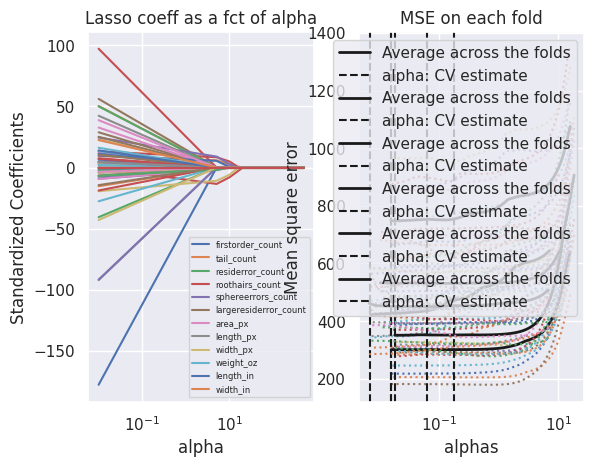

In [ ]:
# devUS#1 from grading
run_LASSO(my_data = data_z, features=grading_ind, indyvar= ['deviation_from_usno1'])

# devUS#1 from reconstruction
run_LASSO(my_data = data_z, features=shapemetrics_ind, indyvar= ['deviation_from_usno1'])

# roundness from reconstruction
run_LASSO(my_data = data_z, features=shapemetrics_ind, indyvar= ['roundness'])

# tailedness from reconstruction
run_LASSO(my_data = data_z, features=shapemetrics_ind, indyvar= ['tailedness'])

# blockiness from reconstruction
run_LASSO(my_data = data_z, features=shapemetrics_ind, indyvar= ['blockiness'])

# curviness from reconstruction
run_LASSO(my_data = data_z, features=shapemetrics_ind, indyvar= ['curviness'])

## Predict from prediction (see description)
We use LASSO to predict each grading feature (roundness, curviness, tailedness, blockiness) from the shapemetrics data. Then, we use those predictions to predict deviation from USNo1

In [ ]:
data_merge_z3 = data_z
data_pred2 = data_merge_z3.dropna()

data_pred2['roundness'] = run_LASSO_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])
data_pred2['curviness'] = run_LASSO_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])
data_pred2['tailedness'] = run_LASSO_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])
data_pred2['blockiness'] = run_LASSO_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])


yvar is ['roundness']
MSE training set 350.95
MSE test set 396.87
0.018476908166457515
[(-0.22136395830438732, 'firstorder_count'), (-0.0, 'tail_count'), (0.0163578097885868, 'residerror_count'), (2.6988160324544803, 'roothairs_count'), (0.0, 'sphereerrors_count'), (-2.1252223567434867, 'largeresiderror_count'), (-34.525033943679155, 'area_px'), (-0.0, 'length_px'), (23.37472643983696, 'width_px'), (20.538449280177343, 'weight_oz'), (-10.34869792116559, 'length_in'), (0.0, 'width_in')]
R squared training set 0.62
R squared test set 0.55
yvar is ['curviness']
MSE training set 454.31
MSE test set 591.08


<ipython-input-17-2770c67ccc13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['roundness'] = run_LASSO_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.04329586267704, tolerance: 33.88288856304986
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1564.0392063957406, tolerance: 33.88288856304986

0.06400034668311924
[(-7.7681582468537576, 'firstorder_count'), (-0.0, 'tail_count'), (0.0, 'residerror_count'), (-0.0, 'roothairs_count'), (-2.237902478032899, 'sphereerrors_count'), (-0.0, 'largeresiderror_count'), (-9.196630224075314, 'area_px'), (7.255926693517103, 'length_px'), (7.71006410955771, 'width_px'), (0.0, 'weight_oz'), (0.0, 'length_in'), (0.0, 'width_in')]
R squared training set 0.12
R squared test set 0.12
yvar is ['tailedness']
MSE training set 783.64
MSE test set 781.75


<ipython-input-17-2770c67ccc13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['curviness'] = run_LASSO_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])


0.015929309546795365
[(-19.488324699548524, 'firstorder_count'), (3.0900752996391536, 'tail_count'), (10.531777612127277, 'residerror_count'), (-0.0, 'roothairs_count'), (-0.0, 'sphereerrors_count'), (-17.984821668248504, 'largeresiderror_count'), (-85.95069860303992, 'area_px'), (30.50449385864615, 'length_px'), (33.54835601256259, 'width_px'), (38.29191828342635, 'weight_oz'), (0.3174730562266635, 'length_in'), (0.19116193952120641, 'width_in')]
R squared training set 0.33
R squared test set 0.25
yvar is ['blockiness']
MSE training set 527.44
MSE test set 511.46


<ipython-input-17-2770c67ccc13>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['tailedness'] = run_LASSO_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])


0.18331079925349247
[(10.163660993295789, 'firstorder_count'), (-0.0, 'tail_count'), (0.0, 'residerror_count'), (0.0, 'roothairs_count'), (1.7680896771891854, 'sphereerrors_count'), (0.0, 'largeresiderror_count'), (1.0628610692561458, 'area_px'), (0.0, 'length_px'), (1.1156105267507652, 'width_px'), (0.0, 'weight_oz'), (0.0, 'length_in'), (0.0, 'width_in')]
R squared training set 0.18
R squared test set 0.16


<ipython-input-17-2770c67ccc13>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['blockiness'] = run_LASSO_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])


yvar is ['deviation_from_usno1']
MSE training set 599.67
MSE test set 684.79
0.0803781702210165
[(-0.0, 'roundness'), (-7.163584372286302, 'tailedness'), (-10.586960262777103, 'blockiness'), (-0.0, 'curviness')]
R squared training set 0.08
R squared test set 0.05


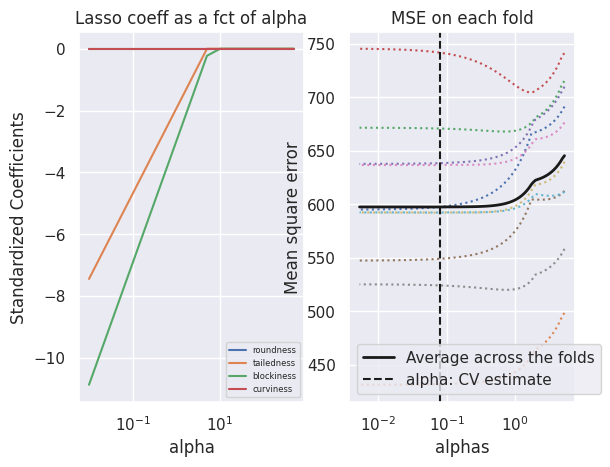

In [ ]:
run_LASSO(my_data = data_pred2, features=grading_ind, indyvar= ['deviation_from_usno1'])
